# 1-D Convection equation :

<center>$$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0$$</center>

Explanation, this equation represents the propagation of a wave with a speed $c$ without change of shape.

Let some initial condition, $u(x,0) = u_0(x)$.
Then the solution, as for every wave, is $u(x,t) = u_0(x-ct)$.

Now let's descritize the equation.
The space derivative becomes, for example :
<center> $$\frac{\partial u}{\partial x} \approx \frac{u(x + \Delta x) - u(x)}{\Delta x}$$ </center>

Applying that we transform our equation in :
<center> $$\frac{u_i^{n+1} - u_i^n}{\Delta t} + c\frac{u_i^n - u_{i-1}^n}{\Delta x} = 0$$ </center>

Where $n$ and $n+1$ are two consecutive steps in time while $i-1$ and $i$ are two close points in space.
Rearranging everything we get that 
<center> $$u_i^{n+1} = u_i^n - c\frac{\Delta t}{\Delta x}(u_i^n - u^n_{i-1})$$ </center>

Right now it's "easy" to implement in python... Let's go !

In [1]:
import numpy
from matplotlib import pyplot
import time, sys

In [2]:
# Allows plot to appears inside the notebook
%matplotlib inline

Now let's define our spatial length of two and 41 points inside then $x_i\in\left[0,2\right]$.


In [3]:
length = 2
nx = 41 # Number of space steps
dx = length / (nx - 1)
nt = 25 # Number of time steps (time is arbitrary here, it is not in seconds or whatever)
dt = 0.025
c = 1 # The speed of the wave

Let $u = 2$ when $ 0.5 \leq x \leq 1$ and $u=1$ everywhere else

In [4]:
u = numpy.ones(nx) # Array of ones
u[int(.5 / dx):int(1 / dx + 1)] = 2 # Middle are twos
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Now we just plot it, examples of plots can be found <a href="http://matplotlib.org/gallery.html"> here </a>

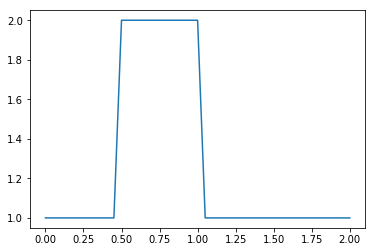

In [5]:
pyplot.plot(numpy.linspace(0,2,nx), u)

Obviously the sides are not perfectly straight because we defined a finite amout of points, and pyplot just links them, so between two points there is a little slope.

Now let's apply the previous formula :
<center> $$u_i^{n+1} = u_i^n - c\frac{\Delta t}{\Delta x}(u_i^n - u^n_{i-1})$$ </center>
And see how it changes over time !

In [6]:
un = numpy.ones(nx) # temp array

for n in range(nt):
    un = u.copy()
    for i in range(1, nx): # Don't start from zero or the i-1 won't be appreciated !
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

<b>Note :</b> Code is not optimized, but it is just to be very understood

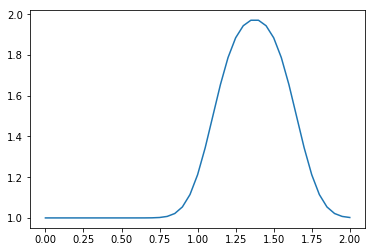

In [7]:
pyplot.plot(numpy.linspace(0, 2, nx), u)

Function has moved to the right as expected but no more hat !

# Non linear convection

What if it becomes non linear, meaning that $c$ isn't a constant anymore but the solution then
<center> $$\frac{u_i^{n+1} - u_i^n}{\Delta t} + c\frac{u_i^n - u_{i-1}^n}{\Delta x} = 0$$ </center>
becomes
<center> $$\frac{u_i^{n+1} - u_i^n}{\Delta t} + u^n_i \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0$$ </center>

And our equation processor transforms into something like this :
<center> $$u_i^{n+1} = u_i^n - u^n_i\frac{\Delta t}{\Delta x}(u_i^n - u^n_{i-1})$$ </center>

In [8]:
# Resetting
nx = 41
dx = 2 / (nx - 1)
nt = 100
dt = .005

u = numpy.ones(nx)
u[int(.5 / dx) : int(1 / dx + 1)] = 2
un = numpy.ones(nx) # Same temp variable

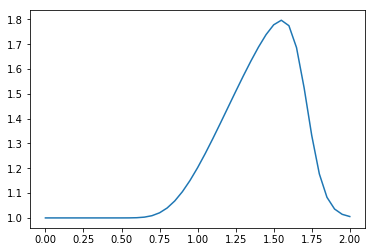

In [9]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx): # Don't start from zero or the i-1 won't be appreciated !
        # Because it isn't linear we can see some kind of straight wall
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])

pyplot.plot(numpy.linspace(0, 2, nx), u)

# Diffusion equation in 1D

So the diffusion equation looks like

<center>
    $$\frac{\partial u}{\partial t} = \nu \frac{\partial^2 u}{\partial x^2}$$
</center>

### Discretize a second derivative

For that we will do a taylor expansion around $u_i$ of $u_{i+1}$ and $u_{i-1}$ :

<center>
    $$u_{i+1} = u_i + \Delta x \left.\frac{\partial u}{\partial x}\right|_i + \left.\frac{\Delta x^2}{2}\frac{\partial^2 u}{\partial x^2} \right|_i + \left. \frac{\Delta x^3}{3!}\frac{\partial^3 u}{\partial x^3} \right|_i + O(\Delta x^4)$$
</center>

<center>
    $$u_{i-1} = u_i - \Delta x \left.\frac{\partial u}{\partial x}\right|_i + \left.\frac{\Delta x^2}{2}\frac{\partial^2 u}{\partial x^2} \right|_i - \left. \frac{\Delta x^3}{3!}\frac{\partial^3 u}{\partial x^3} \right|_i + O(\Delta x^4)$$
</center>

<center>
    $$u_{i+1} + u_{i-1} = 2u_i + \Delta x^2 \left.\frac{\partial^2u}{\partial x^2}\right|_i + O(\Delta x^4)$$
</center>

By rearranging we get that

<center>
    $$\frac{\partial^2u}{\partial x^2} = \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$
</center>

### Back to the diffusion equation

If we now rearrange our first equation we can find that

<center>
    $$u^{n+1}_i = u_i^n + \frac{\nu \Delta t}{\Delta x^2}\left( u^n_{i+1} - 2u_i^n + u^n_{i-1}\right)$$
</center>

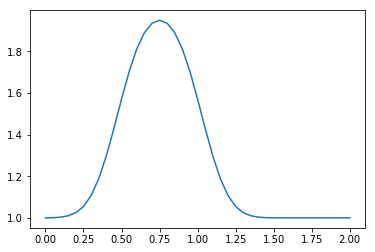

In [10]:
nx = 41
dx = 2 / (nx - 1)
nt = 20    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
sigma = .2 #sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / nu #dt is defined using sigma ... more later!


u = numpy.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx) # placeholder array

for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2*un[i] + un[i-1])

pyplot.plot(numpy.linspace(0, 2, nx), u)

# Burgers' equation

So if we assemble everything we get the following expression :
<center>
    $$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}$$
</center>

Using everything we have seen before we can transform this equation after discretizing it

<center>
    $$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}$$
</center>

So after discretization :

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

And some reorganization :

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

### Initial and boundary conditions

We can set some different initial conditions such as : 

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-x^2}{4 \nu} \bigg) + \exp \bigg(\frac{-(x-2 \pi)^2}{4 \nu} \bigg)
\end{eqnarray}

This has an analytical solution, given by:

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{eqnarray}

The boundary condition will then be

$$ u(0) = u(2\pi ) $$

This is called a periodic boundary condition.

### Save time with sympy

Sympy is the symbolic math library for python and is AWESOME so let's import and configure it. Moreover it is able to produce nice LaTeX outputs.

In [11]:
import sympy
from sympy import init_printing

init_printing(use_latex=True)

Let's see what our equation looks like once computed to sympy

In [12]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t+1))) + sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1))))
phi

Now easy to evaluate the derivative :

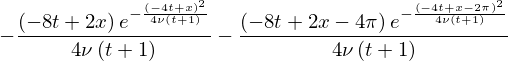

In [13]:
phiprime = phi.diff(x)
phiprime

Now we have to "lambdify it" which will allow us to compute the original equation from what we just made !

In [14]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4 ## The original equation we had
ufunc = lambdify((t, x, nu), u) ## Lambdified it which allows to input values and get the result !
print(ufunc(1, 4, 3))

3.49170664206445


### Back to burgers' equation

Now that we have the initial condition, the boundary condition and the equation lamdified we just have to do as previously !

In [15]:
###variable declarations
nx = 101
nt = 100
dx = 2 * numpy.pi / (nx - 1) ## Fits the boundary condition
nu = .07 ## Kind of frequency
dt = dx * nu

x = numpy.linspace(0, 2 * numpy.pi, nx)
t = 0

u = numpy.asarray([ufunc(t, x0, nu) for x0 in x])
u

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

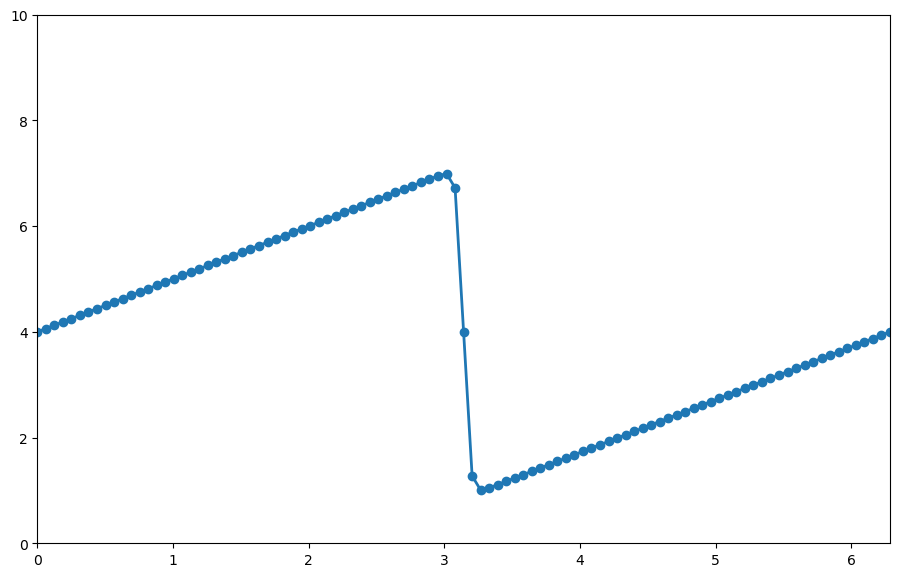

In [16]:
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x, u, marker='o', lw=2)
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10])

This is called the 'saw-tooth' function.

### Periodic boundary function

What we hadn't during the last notebooks was that basically the wave could get out the frame. But thanks to the periodic boundary condition it will just go forward on the left hand side. That's awesome !

A little reminder of the discretization of the function one discretized :

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

In [17]:
un = numpy.empty(nx)
u = numpy.asarray([ufunc(t, x0, nu) for x0 in x])
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt/dx * (un[i] - un[i-1]) + nu * dt/(dx**2) * (un[i+1] - 2*un[i] + un[i-1])
    
    ## Let's not forget to take care of the boundaries
    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-2]) + nu * dt/(dx**2) * (un[1] - 2*un[0] + un[-2])
    u[-1] = u[0]
    
u_analytical = numpy.asarray([ufunc(nt * dt, xi, nu) for xi in x])

pyplot.figure(figsize=(11, 7), dpi=100)
# Shows the difference between the analytical problem solving and the discreet problem solving
pyplot.plot(x,u, marker='o', lw=2, label='Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10])
pyplot.legend();

I suppose that here we can say that there is some kind of gap because the discretized equation misses a lots of terms and therefore some miscorrections that the analytical has. Which is why there is this gap.